In [16]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 25 10:26:27 2018

@author: Shaan
"""

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
import pylab as pl
import random
from sklearn import ensemble
from time import time

In [4]:
digits = load_digits()

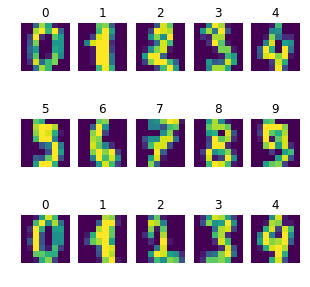

In [6]:
# visualize first 15 images
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5, 5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, interpolation='nearest')
    plt.title('%i' % label)


In [10]:
# Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

In [11]:
# Create random indices
sample_index = random.sample(range(len(x)), int(len(x) / 5))  # 20 - 80 split
valid_index = [i for i in range(len(x)) if i not in sample_index]

In [12]:
# Sample and validation images
sample_images = [x[i] for i in sample_index]
valid_images = [x[i] for i in valid_index]

In [13]:
# Sample and validation targets
sample_target = [y[i] for i in sample_index]
valid_target = [y[i] for i in valid_index]

In [14]:
# Using the Random Tree Classifier
classifier = ensemble.RandomForestClassifier()

In [18]:
# Fit model with sample data
t0 = time()
classifier.fit(sample_images, sample_target)
print ("Time taken to train model : " + str(time() - t0) + "s")

Time taken to train model : 0.0520000457764s


In [19]:
# Attempt to predict validation data
score = classifier.score(valid_images, valid_target)
print('Random Tree Classifier: \n')
print('Score\t' + str(score))

Random Tree Classifier: 

Score	0.8769123783031989


<Figure size 432x288 with 0 Axes>

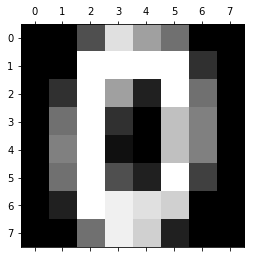

[0]
Time taken to predict from model : 0.00100016593933s


In [23]:
i = 160

pl.gray()
pl.matshow(digits.images[i])
pl.show()
t0 = time()
print(classifier.predict([x[i]]))
print ("Time taken to predict from model : " + str(time() - t0) + "s")